In [ ]:
###### %pylab inline 
import numpy as np 
import matplotlib.pyplot as plt

h=(2*10**(-5))/2000
min_t = 0.0
max_t = 2*10**(-5)
n_puntos = 2000
t = np.zeros(n_puntos)
x = np.zeros(n_puntos)
y = np.zeros(n_puntos)
vx = np.zeros(n_puntos)
vy = np.zeros(n_puntos)
qm = -1.76*10**11
B = 5*10**(-5)
e = 9*10**(-12)
l = -10**(-12)

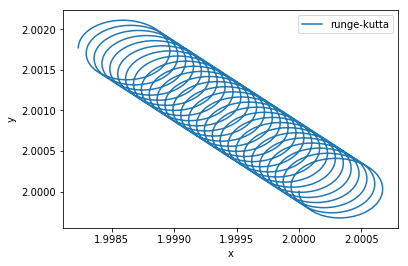

In [2]:
def vxprima(t, vy, x, y):
    return (qm*B*vy)+ ((qm*l*x)/(2*np.pi*e*(x**2 + y**2)))

def vyprima(t, vx, x, y):
    return -(qm*B*vx)+ ((qm*l*y)/(2*np.pi*e*(x**2 + y**2)))

def xprima(vx, x, y):
    return vx

def yprima(vy, x, y):
    return vy

def Rkutta4(t0, y0, vy0, x0, vx0):
    
    kx = xprima(vx0, x0, y0)
    kx_2 = vxprima(t0, vy0, x0, y0)
    ky = yprima(vy0, x0, y0) 
    ky_2 = vyprima(t0, vx0, x0, y0)
                      
    #priemro paso
    t1 = t0+ (h/2.0)
    y_1 = y0 + (h/2.0) * ky
    vy_1 = vy0 + (h/2.0) * ky_2
    x_1 = x0 + (h/2.0) * kx
    vx_1 = vx0 + (h/2.0) * kx_2
    ky2_1 = yprima(vy_1, x_1, y_1)
    ky2_p = vyprima(t1, vx_1, x_1, y_1)
    kx2_1 = xprima(vx_1, x_1, y_1)
    kx2_p= vxprima(t1, vy_1, x_1, y_1)
    
    #segundo paso
    t2 = t0 + (h/2.0)
    y_2 = y0 + (h/2.0) * ky2_1
    vy_2 = vy0 + (h/2.0) * ky2_p
    x_2 = x0 + (h/2.0) * kx2_1
    vx_2 = vx0 + (h/2.0) * kx2_p
    ky3_1 = yprima(vy_2, x_2, y_2)
    ky3_2 = vyprima(t2, vx_2, x_2, y_2)
    kx3_1 = xprima(vx_2, x_2, y_2)
    kx3_2 = vxprima(t2, vy_2, x_2, y_2)
    
    
    #tercer paso
    t3 = t0 + h
    y_3 = y0 + h * ky3_1
    vy_3 = vy0 + h * ky3_2
    x_3 = x0 + h * kx3_1
    vx_3 = vx0 + h * kx3_2
    k_4_yprima = yprima(vy_3, x_3, y_3)
    k_4_vyprima = vyprima(t3, vx_3, x_3, y_3)
    k_4_xprima = xprima(vx_3, x_3, y_3)
    k_4_vxprima = vxprima(t3, vy_3, x_3, y_3)
    
    #fourth step
    promediok1 = (1.0/6.0)*(ky + 2.0*ky2_1 + 2.0*ky3_1 + k_4_yprima)
    promediok2 = (1.0/6.0)*(ky_2 + 2.0*ky2_p + 2.0*ky3_2 + k_4_vyprima)
    promediok3 = (1.0/6.0)*(kx + 2.0*kx2_1 + 2.0*kx3_1 + k_4_xprima)
    promediok4 = (1.0/6.0)*(kx_2 + 2.0*kx2_p + 2.0*kx3_2 + k_4_vxprima)
    
    t = t0 + h
    y = y0 + h * promediok1
    vy= vy0 + h * promediok2
    x = x0 + h * promediok3
    vx= vx0 + h * promediok4
    return t, y, vy, x, vx
    
t[0] = min_t
x[0] = 2.0
y[0] = 2.0
vx[0] = 0.0
vy[0] = -3000    

for i in range(1,n_puntos):
    t[i],y[i],vy[i],x[i],vx[i] = Rkutta4(t[i-1], y[i-1], vy[i-1], x[i-1], vx[i-1])
    
plt.plot(x, y, label = "runge-kutta")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()